<a href="https://colab.research.google.com/github/Mekondjo-EDSA/dsi_repo/blob/master/Twist_challenge_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install fastai -U
import fastai
from fastai.vision.all import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
folders = ['kikuyu', 'berea']

In [7]:
#path to folders containing images 
path = Path('/content/gdrive/MyDrive/grass')

In [8]:
#Check path is correct
path.ls()

(#2) [Path('/content/gdrive/MyDrive/grass/kikuyu'),Path('/content/gdrive/MyDrive/grass/berea')]

## Create DataLoader

In [9]:
#Create the Datablock
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224)
)

In [10]:
# instatnciate the loader
dls = data.dataloaders(path)

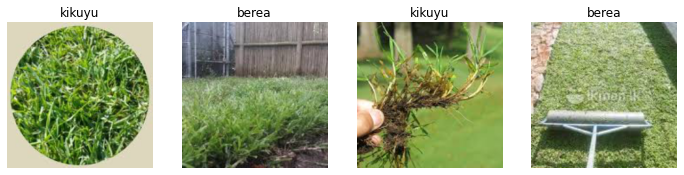

In [11]:
# show a batch of images
dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
learn = cnn_learner(dls, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [27]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.569838,0.633567,0.305882,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.537217,0.632547,0.305882,00:04
1,0.516522,0.651268,0.305882,00:04
2,0.503760,0.659845,0.335294,00:04
3,0.504121,0.670392,0.317647,00:04
4,0.495580,0.701576,0.317647,00:04
5,0.474836,0.687737,0.311765,00:04
6,0.461661,0.798780,0.335294,00:04
7,0.437850,0.724471,0.317647,00:04
8,0.403978,0.750785,0.305882,00:04
9,0.381748,0.779803,0.323529,00:04


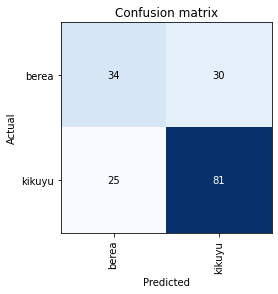

In [28]:
# plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [29]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [30]:
learn.unfreeze()


In [31]:
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,error_rate,time
0,0.214340,1.278058,0.388235,00:04
1,0.400122,2.635668,0.429412,00:04
2,0.518643,1.926186,0.388235,00:04
3,0.535141,0.710841,0.382353,00:04
4,0.517198,0.706603,0.311765,00:04
5,0.474990,1.419005,0.323529,00:04
6,0.436060,1.353798,0.305882,00:04
7,0.396093,0.699596,0.235294,00:04
8,0.360520,0.672543,0.270588,00:04
9,0.322201,0.675952,0.258824,00:04


In [32]:
learn.load('stage-1')

SuggestedLRs(valley=1.737800812406931e-05)

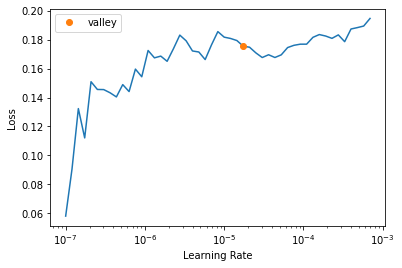

In [33]:
learn.lr_find()

In [38]:
learn.unfreeze()
learn.fit_one_cycle(10, 1.7e-05)

epoch,train_loss,valid_loss,error_rate,time
0,0.193006,0.901189,0.323529,00:04
1,0.159115,0.919270,0.329412,00:04
2,0.171308,0.935081,0.329412,00:04
3,0.160608,0.950495,0.329412,00:04
4,0.151770,0.940398,0.329412,00:04
5,0.147213,0.879696,0.300000,00:04
6,0.144237,0.892332,0.305882,00:04
7,0.135527,0.908936,0.311765,00:04
8,0.137647,0.909512,0.305882,00:04
9,0.140572,0.901073,0.294118,00:04


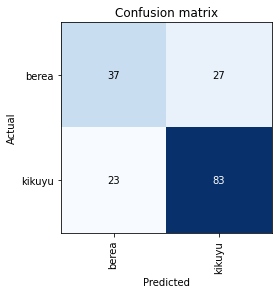

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [40]:
learn.export()